### First import packages, database and get some info

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn import linear_model, preprocessing, tree, model_selection

In [37]:
churn_df=pd.read_csv("C:/Users/Usuario/Anaconda3/Tavo/BankChurn/BankData01.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
print(churn_df.Exited.value_counts(normalize=True))

0    0.7963
1    0.2037
Name: Exited, dtype: float64


### Now, do some basic analysis  

In [40]:
churn_df.groupby(['Exited'])['IsActiveMember'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,0.554565,0.497045,0.0,0.0,1.0,1.0,1.0
1,2037.0,0.360825,0.480358,0.0,0.0,0.0,1.0,1.0


In [41]:
churn_df.groupby(['Exited'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


In [42]:
churn_df.groupby(['Exited'])['Tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,5.033279,2.880658,0.0,3.0,5.0,7.0,10.0
1,2037.0,4.932744,2.936106,0.0,2.0,5.0,8.0,10.0


In [43]:
churn_df.groupby(['Exited'])['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
1,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


In [44]:
churn_df.groupby(['Exited'])['NumOfProducts'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,1.544267,0.509536,1.0,1.0,2.0,2.0,3.0
1,2037.0,1.475209,0.801521,1.0,1.0,1.0,2.0,4.0


In [45]:
churn_df.groupby(['Exited'])['HasCrCard'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,0.707146,0.455101,0.0,0.0,1.0,1.0,1.0
1,2037.0,0.699067,0.458776,0.0,0.0,1.0,1.0,1.0


In [46]:
churn_df.groupby(['Exited'])['CreditScore'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,651.853196,95.653837,405.0,585.0,653.0,718.0,850.0
1,2037.0,645.351497,100.321503,350.0,578.0,646.0,716.0,850.0


In [47]:
churn_df.groupby(['Exited'])['EstimatedSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
0,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
1,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


### Do some deeper analysis 

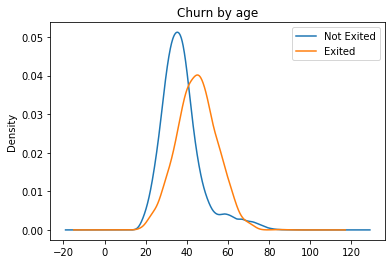

In [48]:
for x in [0,1]:
    churn_df.Age[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by age")
plt.legend(('Not Exited','Exited'))
plt.show()

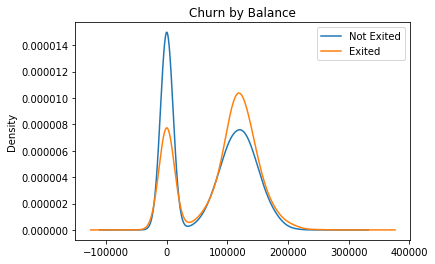

In [49]:
for x in [0,1]:
    churn_df.Balance[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Balance")
plt.legend(('Not Exited','Exited'))
plt.show()

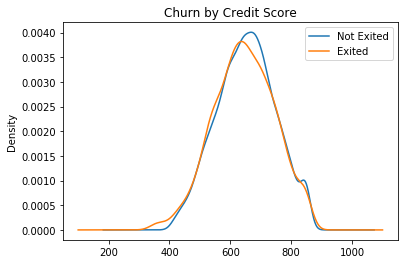

In [50]:
for x in [0,1]:
    churn_df.CreditScore[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Credit Score")
plt.legend(('Not Exited','Exited'))
plt.show()

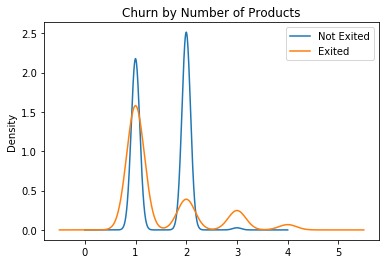

In [51]:
for x in [0,1]:
    churn_df.NumOfProducts[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Number of Products")
plt.legend(('Not Exited','Exited'))
plt.show()

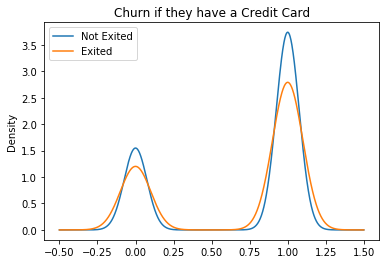

In [52]:
for x in [0,1]:
    churn_df.HasCrCard[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn if they have a Credit Card")
plt.legend(('Not Exited','Exited'))
plt.show()

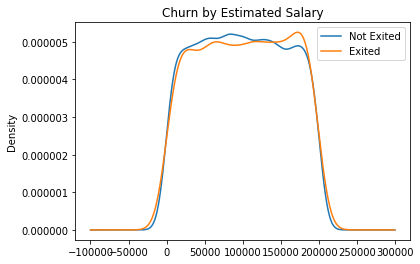

In [53]:
for x in [0,1]:
    churn_df.EstimatedSalary[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Estimated Salary")
plt.legend(('Not Exited','Exited'))
plt.show()

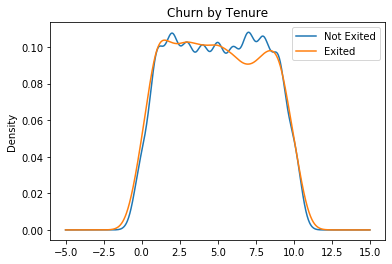

In [54]:
for x in [0,1]:
    churn_df.Tenure[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Tenure")
plt.legend(('Not Exited','Exited'))
plt.show()

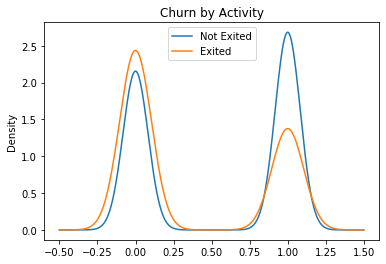

In [55]:
for x in [0,1]:
    churn_df.IsActiveMember[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Activity")
plt.legend(('Not Exited','Exited'))
plt.show()

### Transform the variable Gender 

In [56]:
churn_df.Gender = churn_df.Gender.map({"Male": 0, "Female": 1})
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


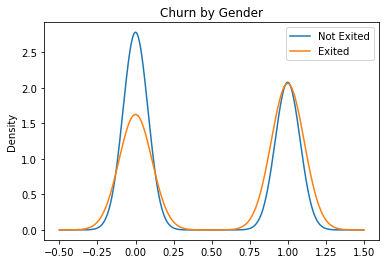

In [57]:
for x in [0,1]:
    churn_df.Gender[churn_df.Exited==x].plot(kind='kde')
plt.title("Churn by Gender")
plt.legend(('Not Exited','Exited'))
plt.show()

### Start building the regression

In [59]:
train_features_names = ["IsActiveMember", "Age", "HasCrCard", "NumOfProducts", "Balance", "Gender"]
training_target = churn_df["Exited"].values
training_features = churn_df[train_features_names].values

### Regression Model

In [82]:
MLalgo = linear_model.LogisticRegression(solver='lbfgs')
MLmodel = MLalgo.fit(training_features, training_target)
print("Linear Model score:",MLmodel.score(training_features, training_target))
scores = model_selection.cross_val_score(MLalgo, training_features,training_target,scoring="accuracy", cv=50)
print("Cross Validation of linear model:",scores.mean())

Linear Model score: 0.7963
Cross Validation of linear model: 0.7967018775469387


In [83]:
poly = preprocessing.PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(training_features)
MLmodel = MLalgo.fit(poly_features, training_target)
print("Polynomial Model score:", MLmodel.score(poly_features, training_target))
scores = model_selection.cross_val_score(MLalgo, poly_features,training_target,scoring="accuracy", cv=50)
print("Cross Validation of polynomial model:",scores.mean())

Polynomial Model score: 0.7963
Cross Validation of polinomial model: 0.7963038675966899


### Decision Trees 

In [118]:
print(churn_df.groupby(["IsActiveMember","NumOfProducts"]).Exited.mean())

IsActiveMember  NumOfProducts
0               1                0.366521
                2                0.098881
                3                0.882353
                4                1.000000
1               1                0.189231
                2                0.055601
                3                0.752212
                4                1.000000
Name: Exited, dtype: float64


In [119]:
print(churn_df.groupby(["IsActiveMember","HasCrCard","NumOfProducts"]).Exited.mean())

IsActiveMember  HasCrCard  NumOfProducts
0               0          1                0.345404
                           2                0.104265
                           3                0.902439
                           4                1.000000
                1          1                0.374931
                           2                0.096625
                           3                0.875000
                           4                1.000000
1               0          1                0.215736
                           2                0.064698
                           3                0.771429
                           4                1.000000
                1          1                0.177465
                           2                0.051873
                           3                0.743590
                           4                1.000000
Name: Exited, dtype: float64


In [120]:
print(churn_df.NumOfProducts.value_counts())
print(churn_df.NumOfProducts[churn_df.Exited == 1].value_counts())

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
1    1409
2     348
3     220
4      60
Name: NumOfProducts, dtype: int64


Decision tree score: 0.976
Cross Validation of decision tree: 0.7954918722968075


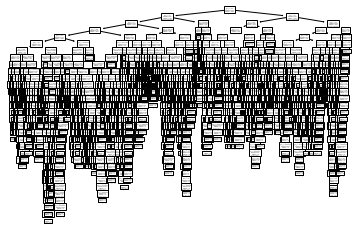

In [114]:
MLalgotree = tree.DecisionTreeClassifier(random_state=1)
MLmodeltree = MLalgotree.fit(training_features, training_target)
print("Decision tree score:", MLmodeltree.score(training_features, training_target))
scorestree = model_selection.cross_val_score(MLalgotree, training_features, training_target, scoring="accuracy", cv=50)
print("Cross Validation of decision tree:", scorestree.mean())

tree.plot_tree(MLmodeltree)
plt.show()


Decision tree score: 0.8399
Cross Validation of decision tree: 0.8386988999724995


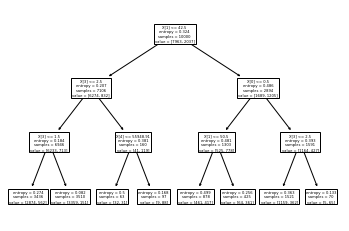

In [115]:
MLalgotree = tree.DecisionTreeClassifier(random_state=1,max_depth=3, min_samples_split=4)
MLmodeltree = MLalgotree.fit(training_features, training_target)
print("Decision tree score:", MLmodeltree.score(training_features, training_target))
scorestree = model_selection.cross_val_score(MLalgotree, training_features, training_target, scoring="accuracy", cv=50)
print("Cross Validation of decision tree:", scorestree.mean())

tree.plot_tree(MLmodeltree)
plt.show()